In [50]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#get selected features (top 10 by Fisher's criterion) from 00_EDA.ipynb
%store -r features_dwt_topten_8 features_wang_topten_8 features_jones_topten_8

In [51]:
#return intersection of top 10 features with dwt and jones methods
print((features_dwt_topten_8[:-1]).intersection(set(features_wang_topten_8[:-1])))

Index(['slope_6', 'slope_29', 'slope_4', 'slope_17', 'slope_25', 'slope_14'], dtype='object')


In [52]:
ftnum_dwt_topten_8 = [int(ft.replace('slope_', '')) for ft in features_dwt_topten_8[:-1]]
ftnum_wang_topten_8 = [int(ft.replace('slope_', '')) for ft in features_wang_topten_8[:-1]]
ftnum_jones_topten_8 = [int(ft.replace('slope_', '')) for ft in features_jones_topten_8[:-1]]

print(ftnum_dwt_topten_8)
print(ftnum_wang_topten_8)
print(ftnum_jones_topten_8)

[6, 29, 4, 11, 28, 17, 20, 24, 25, 14]
[6, 27, 29, 17, 25, 21, 14, 4, 26, 19]
[6, 28, 20, 5, 24, 23, 29, 22, 8, 16]


In [53]:
sample = pd.read_csv(os.path.join(os.getcwd(), '8-7-02/Cancer/Ovarian Cancer daf-0601.csv'))

In [54]:
def mz_ratio_windows(x):
    start = 1 + 500*(x-1)
    end = start + (1024-1)

    return start, end

In [86]:
#start and end m/z indices of 1st through 3rd window
print(mz_ratio_windows(1))
print(mz_ratio_windows(2))
print(mz_ratio_windows(3))

(1, 1024)
(501, 1524)
(1001, 2024)


In [56]:
mz_ratio_windows(2)

(501, 1524)

In [57]:
mz_dwt_topten_8 = [mz_ratio_windows(x) for x in ftnum_dwt_topten_8]
mz_wang_topten_8 = [mz_ratio_windows(x) for x in ftnum_wang_topten_8]
mz_jones_topten_8 = [mz_ratio_windows(x) for x in ftnum_jones_topten_8]

print(mz_dwt_topten_8)
print(mz_wang_topten_8)
print(mz_jones_topten_8)

[(2501, 3524), (14001, 15024), (1501, 2524), (5001, 6024), (13501, 14524), (8001, 9024), (9501, 10524), (11501, 12524), (12001, 13024), (6501, 7524)]
[(2501, 3524), (13001, 14024), (14001, 15024), (8001, 9024), (12001, 13024), (10001, 11024), (6501, 7524), (1501, 2524), (12501, 13524), (9001, 10024)]
[(2501, 3524), (13501, 14524), (9501, 10524), (2001, 3024), (11501, 12524), (11001, 12024), (14001, 15024), (10501, 11524), (3501, 4524), (7501, 8524)]


In [58]:
#return intersection of top 10 features'  with dwt and jones methods
s1 = set(mz_dwt_topten_8).intersection(set(mz_wang_topten_8))
s2 = s1.intersection(set(ftnum_jones_topten_8))

print(s1)
print(s2)

{(14001, 15024), (12001, 13024), (6501, 7524), (8001, 9024), (2501, 3524), (1501, 2524)}
set()


[(2501, 3524), (14001, 15024), (1501, 2524), (5001, 6024), (13501, 14524), (8001, 9024), (9501, 10524), (11501, 12524), (12001, 13024), (6501, 7524)]


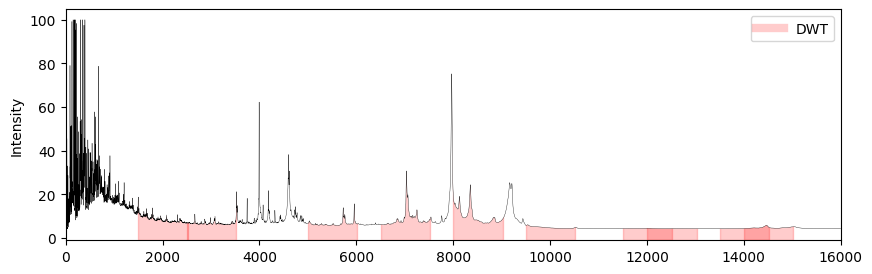

In [87]:
print(mz_dwt_topten_8)

plt.figure(figsize=(10, 3))
plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
#plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

[plt.axvspan(mz_dwt_topten_8[i][0], mz_dwt_topten_8[i][1], ymin=0, ymax=0.80, color='red', alpha=0.20) for i in range(len(mz_dwt_topten_8))]

plt.fill_between(sample['M/Z'], sample['Intensity'], 100, facecolor='white', alpha=1)

custom_lines = [Line2D([0], [0], color='red', alpha=0.2, lw=6)]

plt.legend(custom_lines, ['DWT'])

plt.show()

[(2501, 3524), (13001, 14024), (14001, 15024), (8001, 9024), (12001, 13024), (10001, 11024), (6501, 7524), (1501, 2524), (12501, 13524), (9001, 10024)]


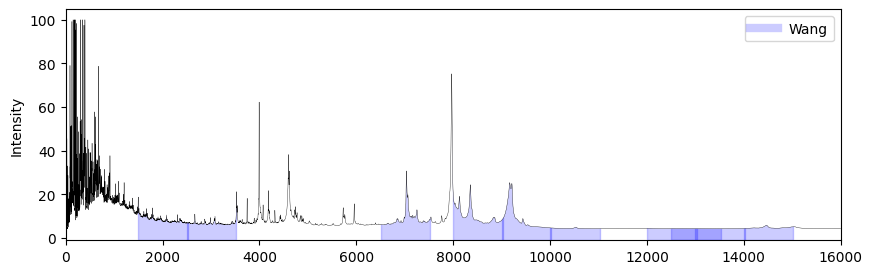

In [88]:
print(mz_wang_topten_8)

plt.figure(figsize=(10, 3))
plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
#plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

[plt.axvspan(mz_wang_topten_8[i][0], mz_wang_topten_8[i][1], ymin=0, ymax=0.80, color='blue', alpha=0.20) for i in range(len(mz_wang_topten_8))]

plt.fill_between(sample['M/Z'], sample['Intensity'], 100, facecolor='white', alpha=1)

custom_lines = [Line2D([0], [0], color='blue', alpha=0.2, lw=6)]

plt.legend(custom_lines, ['Wang'])

plt.show()

[(2501, 3524), (13501, 14524), (9501, 10524), (2001, 3024), (11501, 12524), (11001, 12024), (14001, 15024), (10501, 11524), (3501, 4524), (7501, 8524)]


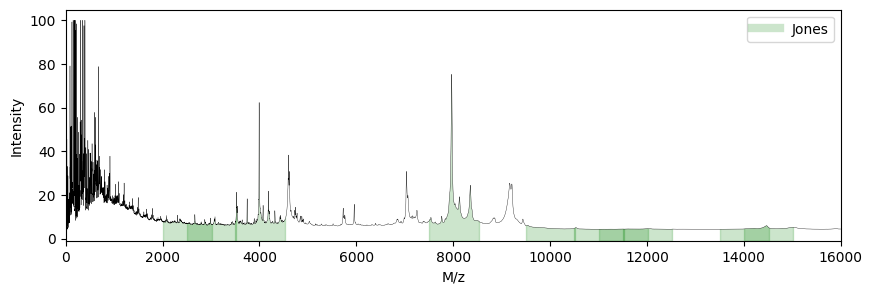

In [89]:
print(mz_jones_topten_8)

plt.figure(figsize=(10, 3))
plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

[plt.axvspan(mz_jones_topten_8[i][0], mz_jones_topten_8[i][1], ymin=0, ymax=0.80, color='green', alpha=0.20) for i in range(len(mz_jones_topten_8))]

plt.fill_between(sample['M/Z'], sample['Intensity'], 100, facecolor='white', alpha=1)

custom_lines = [Line2D([0], [0], color='green', alpha=0.2, lw=6)]

plt.legend(custom_lines, ['Jones'])

plt.show()

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

[plt.axvspan(mz__topten_8[i][0], mz_wang_topten_8[i][1], ymin=0, ymax=0.80, color='blue', alpha=0.20) for i in range(len(mz_wang_topten_8))]

plt.fill_between(sample['M/Z'], sample['Intensity'], 100, facecolor='white', alpha=1)

custom_lines = [Line2D([0], [0], color='blue', alpha=0.2, lw=6)]

plt.legend(custom_lines, ['Wang'])

plt.show()

## Scratchpad

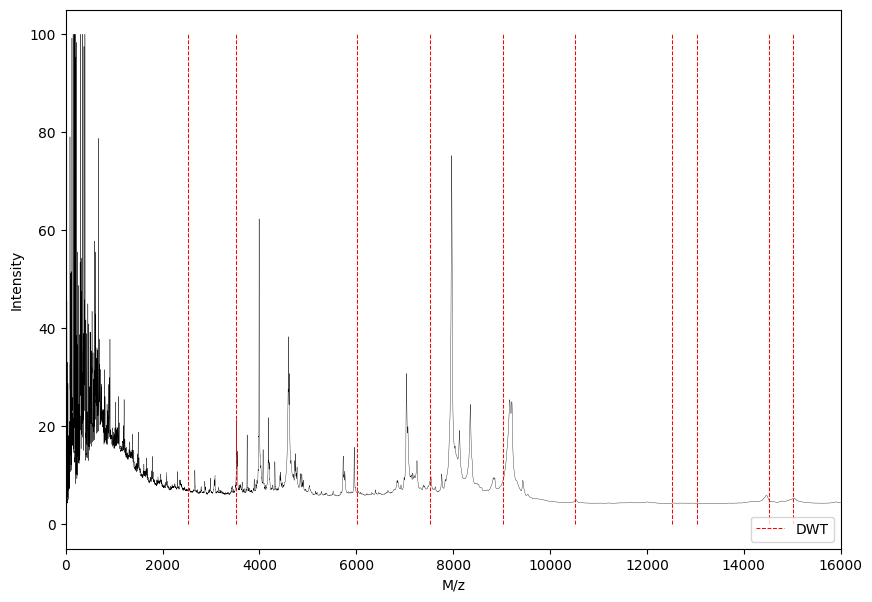

In [185]:
plt.figure(figsize=(10, 7))

plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

#plt.axvline(x = 2000, color = 'b', label = 'axvline - full height')
plt.vlines(x = mz_dwt_topten_8, ymin = 0, ymax=100, linestyles='dashed', color='red', label='DWT', linewidth=0.75)
#plt.vlines(x = mz_wang_topten_8, ymin = 0, ymax=100, linestyles='dotted', color='darkblue', label='Wang', linewidth=0.75)
#plt.vlines(x = mz_jones_topten_8, ymin = 0, ymax=100, linestyles='dashdot', color='green', label='Jones')

plt.legend(loc='lower right')